In [32]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Load nodes from a Pandas DataFrame
# Example DataFrame with columns X, Y, Z, Atom_Name, Residue_Name, Residue_ID, Atom_Type, and Timeframe
# Load nodes for all timesteps
filepath = '/home/mhanowar/Downloads/dataframe100frames.csv'  # Replace with the actual file path
df = pd.read_csv(filepath)
atom_types = ['o', 'os', 'n', 'hn']
df= df.query('Atom_Type in @atom_types').reset_index(drop=True)
df

,X,Y,Z,Atom_Name,Residue_Name,Residue_ID,Atom_Type,Timeframe
0,10.847510,-3.840538,27.752209,O8,CSP,1,os,0
1,12.441049,-2.132687,27.330761,O10,CSP,1,o,0
2,11.649165,-2.592921,29.447174,N11,CSP,1,n,0
3,7.650953,-0.410268,23.051884,O20,CSP,1,os,0
4,6.456014,0.043451,24.958599,O22,CSP,1,o,0
...,...,...,...,...,...,...,...,...
88395,33.796783,54.585758,68.484253,O2,SFL,12,o,99
88396,47.951912,30.325182,57.910664,O1,SFL,13,os,99
88397,50.853600,27.902849,56.672512,O2,SFL,13,o,99
88398,52.845436,40.218285,67.283249,O1,SFL,14,os,99


In [34]:
# Merge 'Atom_Name' and 'Residue_ID' into 'Node'
df['Node'] = df['Atom_Name'].astype(str) + '_' + df['Residue_ID'].astype(str)

# Drop unnecessary columns
columns_to_drop = ['Atom_Name', 'Residue_Name', 'Residue_ID', 'Atom_Type']
df = df.drop(columns=columns_to_drop)

# Sorting the DataFrame based on the 'Node' column
df = df.sort_values(by='Node')

# Print the modified DataFrame
print("Modified DataFrame Shape:", df.shape)
print(df)



Modified DataFrame Shape: (88400, 5)
               X         Y          Z  Timeframe    Node
25806   9.597869  2.942067  31.569969         29  H103_1
75310   8.926670  3.424206  31.639782         85  H103_1
26690   8.972098  3.365131  31.678024         30  H103_1
66470   8.738058  3.454309  31.555746         75  H103_1
67354   8.845688  3.981585  31.690811         76  H103_1
...          ...       ...        ...        ...     ...
31607  71.065826  9.190027  29.502651         35   O98_4
17463  70.441620  9.141562  28.718157         19   O98_4
1551   70.879860  9.034083  28.953461          1   O98_4
11275  71.166382  8.930011  29.432276         12   O98_4
43983  70.573975  9.133989  28.709064         49   O98_4

[88400 rows x 5 columns]


In [35]:
# # Your dataset
# data = {
#     'X': [10.847510, 12.441049, 11.649165, 7.650953],
#     'Y': [-3.840538, -2.132687, -2.592921, -0.410268],
#     'Z': [27.752209, 27.330761, 29.447174, 23.051884],
#     'Timeframe': [0, 0, 1, 1],
#     'Node': ['O8_1', 'O10_1', 'O8_1', 'O10_1']
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# Set 'Timeframe' as the index
df.set_index('Timeframe', inplace=True)

# Convert 'Timeframe' to float
df.index = df.index.astype(float)

# Create a continuous range of timeframes with a step of 0.1
continuous_timeframes = pd.Index(np.arange(df.index.min(), df.index.max() + 0.1, 0.1))

# Interpolate each group separately
interpolated_dfs = []
for node, group in df.groupby('Node'):
    interpolated_group = group.reindex(continuous_timeframes).interpolate(method='linear')
    interpolated_group['Node'] = node  # Add the 'Node' column back
    interpolated_dfs.append(interpolated_group)

# Concatenate the results
interpolated_df = pd.concat(interpolated_dfs).reset_index()

# Rename the 'index' column to 'Timeframe'
interpolated_df.rename(columns={'index': 'Timeframe'}, inplace=True)




/tmp/ipykernel_2841419/3392371214.py:25: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.reindex(continuous_timeframes).interpolate(method='linear')
/tmp/ipykernel_2841419/3392371214.py:25: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.reindex(continuous_timeframes).interpolate(method='linear')
/tmp/ipykernel_2841419/3392371214.py:25: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.reindex(continuous_timeframes).interpolate(method='linear')
/tmp/ipykernel_2841419/3392371214.py:25: FutureWarning: DataFrame.interpolate with object dtype is d

In [36]:
# Print the interpolated DataFrame
df = interpolated_df
df

,Timeframe,X,Y,Z,Node
0,0.0,9.511472,3.176583,31.707520,H103_1
1,0.1,9.506754,3.184542,31.681484,H103_1
2,0.2,9.502036,3.192501,31.655449,H103_1
3,0.3,9.497319,3.200460,31.629414,H103_1
4,0.4,9.492601,3.208419,31.603378,H103_1
...,...,...,...,...,...
876039,98.6,70.399217,9.256970,28.777818,O98_4
876040,98.7,70.362151,9.298574,28.804226,O98_4
876041,98.8,70.325085,9.340177,28.830635,O98_4
876042,98.9,70.288020,9.381780,28.857043,O98_4


In [37]:
import pandas as pd
import numpy as np
from itertools import combinations

# Function to calculate Euclidean distance between two nodes
def calculate_distance(node1, node2):
    return np.linalg.norm(node1 - node2)

# Function to create edges within a distance threshold
def create_edges_within_threshold(nodes, node_names, threshold):
    edges = []
    num_nodes = len(nodes)
    for i, j in combinations(range(num_nodes), 2):
        node1, node2 = nodes[i], nodes[j]
        distance = calculate_distance(node1, node2)
        if distance <= threshold:
            edges.append((node_names[i], node_names[j], distance))
    return edges

# # Your DataFrame
# data = {
#     'Timeframe': [0.0, 0.1, 0.2, 0.0, 0.1, 0.2, 0.0, 0.1, 0.2],
#     'X': [9.511472, 9.506754, 9.502036, 9.497319, 9.492601, 9.854604, 27.835545, 27.816486, 27.797427],
#     'Y': [3.176583, 3.184542, 3.192501, 3.200460, 3.208419, 3.476914, 6.484113, 6.491312, 6.498511],
#     'Z': [31.707520, 31.681484, 31.655449, 31.629414, 31.603378, 31.289037, 26.303622, 26.318208, 26.332793],
#     'Node': ['H103_1', 'H103_1', 'H103_1', 'H103_2', 'H103_2', 'H103_2', 'H103_3', 'H103_3', 'H103_3']
# }

# df = pd.DataFrame(data)

# Specify the maximum timeframe
max_timeframe = 2

# Filter DataFrame for timeframes up to 0.1
df_filtered = df[df['Timeframe'] <= max_timeframe]

# Specify the distance threshold
distance_threshold = 2.0  # You can adjust this threshold as needed

# Create edges for each timeframe
all_edges = []
for timeframe, group in df_filtered.groupby('Timeframe'):
    nodes = group[['X', 'Y', 'Z']].values
    node_names = group['Node'].values
    edges = create_edges_within_threshold(nodes, node_names, distance_threshold)
    all_edges.extend([(timeframe, edge[0], edge[1], edge[2]) for edge in edges])

# Create DataFrame for edges
columns = ['Timeframe', 'Node1', 'Node2', 'Edge_Dist']
edges_df = pd.DataFrame(all_edges, columns=columns)

# edges_df.to_parquet(100)



In [38]:
df = edges_df
df.head(1000)

,Timeframe,Node1,Node2,Edge_Dist
0,0.0,H103_1,N123_1,1.013001
1,0.0,H103_2,N123_2,1.013000
2,0.0,H103_3,N123_3,1.012999
3,0.0,H103_4,N123_4,1.013000
4,0.0,H103_4,O54_4,1.889322
...,...,...,...,...
995,0.4,H305_2,N363_2,1.011167
996,0.4,H305_3,N363_3,0.992855
997,0.4,H305_4,N363_4,1.004391
998,0.4,H315_1,N375_1,1.012005


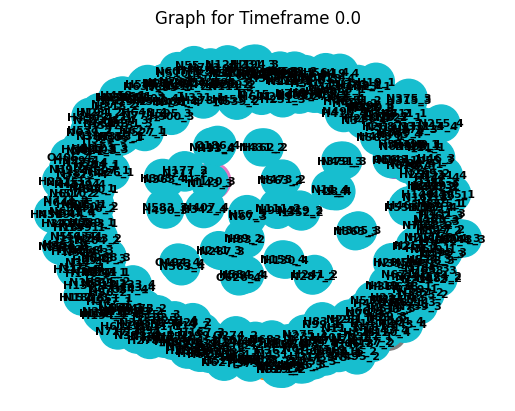

In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# # Sample DataFrame
# data = {
#     'Timeframe': [0.0, 0.0, 0.0, 0.0, 0.0],
#     'Node1': ['H103_1', 'H103_1', 'H103_1', 'H103_1', 'H103_1'],
#     'Node2': ['N123_1', 'N55_1', 'O108_1', 'O120_1', 'O122_1'],
#     'Edge_Dist': [1.013001, 4.348434, 4.980140, 2.276632, 3.058818]
# }

# df_selected = pd.DataFrame(data)

# Specify the selected timeframe
selected_timeframe = 0.0

# Filter DataFrame for the specified timeframe
df_selected = df[df['Timeframe'] == selected_timeframe]

# Get unique nodes from both Node1 and Node2 columns
all_nodes = pd.concat([df_selected['Node1'], df_selected['Node2']]).unique()

# Assign a color to each node
node_colors = {node: plt.cm.tab10(i) for i, node in enumerate(all_nodes)}

# Plot the graph using networkx and matplotlib
G = nx.from_pandas_edgelist(df_selected, 'Node1', 'Node2', ['Edge_Dist'])
pos = nx.spring_layout(G)

# Draw nodes with specified colors
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=700)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw labels
nx.draw_networkx_labels(G, pos, font_weight='bold', font_color='black', font_size=8)

plt.title(f'Graph for Timeframe {df_selected["Timeframe"].iloc[0]}')
plt.axis('off')
plt.show()
